# Modelling using SVM

In [24]:
import pandas as pd

df = pd.read_csv('../data/preprocessed/review_tiktok_dataset_sentiment_indobertweet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   at                100000 non-null  object 
 1   reviewId          100000 non-null  object 
 2   userName          100000 non-null  object 
 3   score             100000 non-null  int64  
 4   content           100000 non-null  object 
 5   cleaning          100000 non-null  object 
 6   case_folding      100000 non-null  object 
 7   no_elongation     100000 non-null  object 
 8   formalization     99773 non-null   object 
 9   tokenized         100000 non-null  object 
 10  stopword_removal  100000 non-null  object 
 11  stemming          100000 non-null  object 
 12  sentiment         100000 non-null  object 
 13  confident_score   100000 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 10.7+ MB


In [25]:
df_filtered = df[df['confident_score'] >= 0.9]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78304 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   at                78304 non-null  object 
 1   reviewId          78304 non-null  object 
 2   userName          78304 non-null  object 
 3   score             78304 non-null  int64  
 4   content           78304 non-null  object 
 5   cleaning          78304 non-null  object 
 6   case_folding      78304 non-null  object 
 7   no_elongation     78304 non-null  object 
 8   formalization     78295 non-null  object 
 9   tokenized         78304 non-null  object 
 10  stopword_removal  78304 non-null  object 
 11  stemming          78304 non-null  object 
 12  sentiment         78304 non-null  object 
 13  confident_score   78304 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 9.0+ MB


In [26]:
df_filtered.isna().sum()

at                  0
reviewId            0
userName            0
score               0
content             0
cleaning            0
case_folding        0
no_elongation       0
formalization       9
tokenized           0
stopword_removal    0
stemming            0
sentiment           0
confident_score     0
dtype: int64

In [27]:
df_filtered = df_filtered.dropna(subset=['formalization']).reset_index(drop=True)

In [28]:
df_filtered.isna().sum()

at                  0
reviewId            0
userName            0
score               0
content             0
cleaning            0
case_folding        0
no_elongation       0
formalization       0
tokenized           0
stopword_removal    0
stemming            0
sentiment           0
confident_score     0
dtype: int64

## Sentimnet Distribution

In [29]:
df_filtered['sentiment'].value_counts()

sentiment
Negative    58747
Positive    10881
Neutral      8667
Name: count, dtype: int64

## Data Split

In [30]:
from sklearn.model_selection import train_test_split

X = df_filtered['stemming']
y = df_filtered['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})


## Resampling

In [31]:
train_df['label'].value_counts()

label
Negative    46998
Positive     8705
Neutral      6933
Name: count, dtype: int64

In [32]:
from sklearn.utils import resample

# Pisahkan tiap kelas
df_negative = train_df[train_df['label'] == 'Negative'].sample(n=6933, random_state=42)
df_positive = train_df[train_df['label'] == 'Positive'].sample(n=6933, random_state=42)
df_neutral = train_df[train_df['label'] == 'Neutral']


# df_positive = resample(
#     train_df[train_df['label'] == 'Positive'],
#     replace=True,
#     n_samples=10000,  
#     random_state=42
# )

# df_neutral = resample(
#     train_df[train_df['label'] == 'Neutral'],
#     replace=True,
#     n_samples=8705,
#     random_state=42
# )

# Gabungkan dan acak
train_balanced = pd.concat([df_negative, df_positive, df_neutral]).sample(frac=1, random_state=42).reset_index(drop=True)


In [33]:
train_balanced['label'].value_counts()

label
Positive    6933
Neutral     6933
Negative    6933
Name: count, dtype: int64

## TF-IDF Vectorization & Modelling


📌 Evaluating max_features=40000 ...
Accuracy       : 0.8992
F1-Macro       : 0.8297
F1-Weighted    : 0.9054

Classification Report:
              precision    recall  f1-score
Negative       0.980803  0.913184  0.945786
Neutral        0.571189  0.786621  0.661815
Positive       0.852058  0.913143  0.881544
accuracy       0.899163  0.899163  0.899163
macro avg      0.801350  0.870983  0.829715
weighted avg   0.917554  0.899163  0.905413


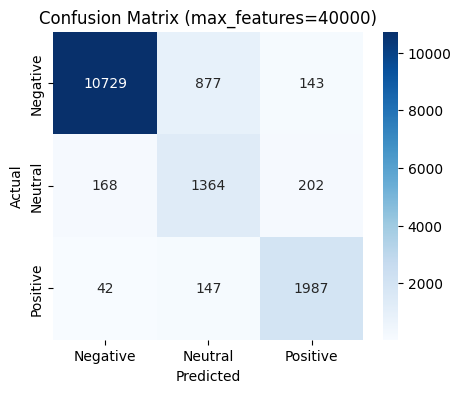


📌 Evaluating max_features=50000 ...
Accuracy       : 0.8995
F1-Macro       : 0.8304
F1-Weighted    : 0.9057

Classification Report:
              precision    recall  f1-score
Negative       0.980539  0.913439  0.945801
Neutral        0.573171  0.786044  0.662938
Positive       0.852312  0.914982  0.882535
accuracy       0.899547  0.899547  0.899547
macro avg      0.802007  0.871488  0.830425
weighted avg   0.917610  0.899547  0.905686


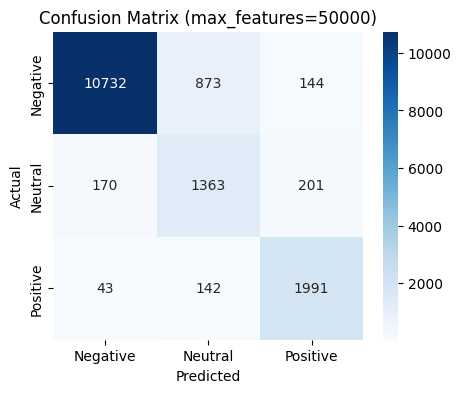


📌 Evaluating max_features=60000 ...
Accuracy       : 0.9001
F1-Macro       : 0.8306
F1-Weighted    : 0.9061

Classification Report:
              precision    recall  f1-score
Negative       0.980646  0.914291  0.946307
Neutral        0.575847  0.783737  0.663898
Positive       0.849893  0.915901  0.881663
accuracy       0.900057  0.900057  0.900057
macro avg      0.802129  0.871309  0.830623
weighted avg   0.917651  0.900057  0.906051


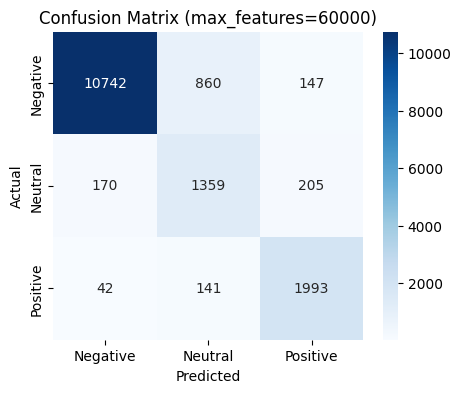


📌 Evaluating max_features=70000 ...
Accuracy       : 0.8999
F1-Macro       : 0.8304
F1-Weighted    : 0.9059

Classification Report:
              precision    recall  f1-score
Negative       0.980287  0.914205  0.946094
Neutral        0.575064  0.782007  0.662757
Positive       0.850683  0.916360  0.882301
accuracy       0.899866  0.899866  0.899866
macro avg      0.802011  0.870858  0.830384
weighted avg   0.917404  0.899866  0.905853


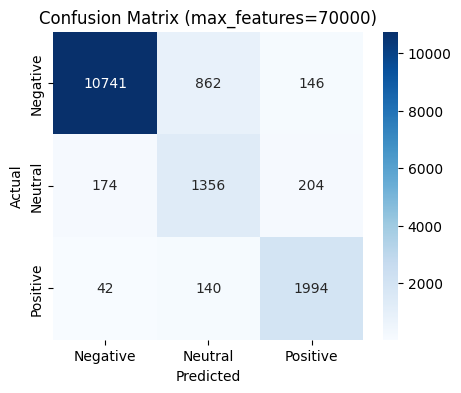


📌 Evaluating max_features=80000 ...
Accuracy       : 0.9011
F1-Macro       : 0.8320
F1-Weighted    : 0.9069

Classification Report:
              precision    recall  f1-score
Negative       0.980578  0.915312  0.946822
Neutral        0.580273  0.783737  0.666830
Positive       0.849787  0.917739  0.882457
accuracy       0.901079  0.901079  0.901079
macro avg      0.803546  0.872263  0.832036
weighted avg   0.918075  0.901079  0.906873


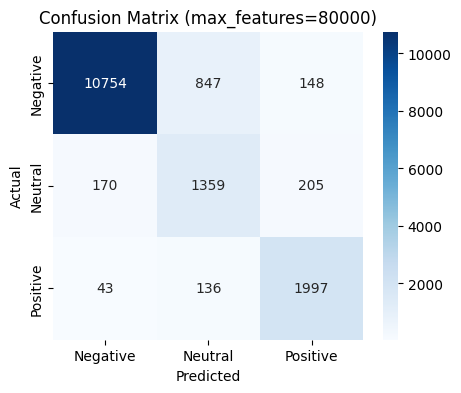


📌 Evaluating max_features=90000 ...
Accuracy       : 0.9021
F1-Macro       : 0.8332
F1-Weighted    : 0.9077

Classification Report:
              precision    recall  f1-score
Negative       0.980251  0.916759  0.947442
Neutral        0.584231  0.782007  0.668804
Positive       0.850638  0.918658  0.883341
accuracy       0.902101  0.902101  0.902101
macro avg      0.805040  0.872475  0.833196
weighted avg   0.918387  0.902101  0.907680


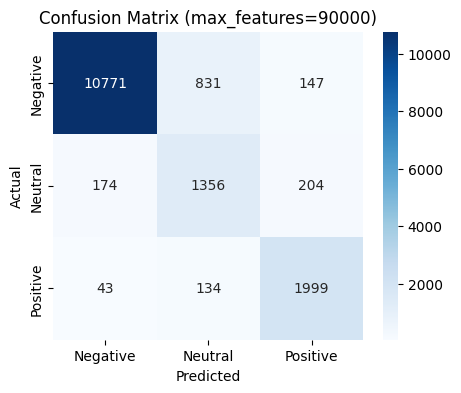

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

max_features_list = [40000, 50000, 60000, 70000, 80000, 90000]
results = []

for mf in max_features_list:
    print(f"\n📌 Evaluating max_features={mf} ...")
    
    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=mf, ngram_range=(1, 2))
    X_train_vec = vectorizer.fit_transform(train_balanced['text'])
    X_test_vec = vectorizer.transform(test_df['text'])

    # SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_vec, train_balanced['label'])

    # Predict
    y_pred = model.predict(X_test_vec)
    y_true = test_df['label']

    # Evaluation Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, output_dict=True, digits=4)
    cm = confusion_matrix(y_true, y_pred, labels=["Negative", "Neutral", "Positive"])

    # Save results
    results.append({
        'max_features': mf,
        'accuracy': acc,
        'f1_macro': report_dict['macro avg']['f1-score'],
        'report': report_dict,
        'confusion_matrix': cm
    })

    # Print Report
    print(f"Accuracy       : {acc:.4f}")
    print(f"F1-Macro       : {report_dict['macro avg']['f1-score']:.4f}")
    print(f"F1-Weighted    : {report_dict['weighted avg']['f1-score']:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(report_dict).transpose()[['precision', 'recall', 'f1-score']])

    # Confusion Matrix (visual)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f'Confusion Matrix (max_features={mf})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
